In [1]:
import subprocess
import sys

print("📦 Installing all required packages...")
print("=" * 60)

packages = [
    'numpy',
    'pandas',
    'scikit-learn',
    'matplotlib',
    'seaborn',
    'openpyxl',  # For reading Excel files
    'nltk',
    'tqdm',
    'torch --index-url https://download.pytorch.org/whl/cpu',  # CPU version of PyTorch
    'transformers',
    'sentencepiece',
    'accelerate',
    'datasets'
]

for package in packages:
    print(f"\n🔄 Installing {package.split()[0]}...")
    try:
        result = subprocess.run(
            [sys.executable, '-m', 'pip', 'install'] + package.split(),
            capture_output=True,
            text=True,
            timeout=300
        )
        if result.returncode == 0:
            print(f"   ✅ {package.split()[0]} installed")
        else:
            print(f"   ⚠️ {package.split()[0]} had issues")
    except Exception as e:
        print(f"   ❌ Error: {str(e)[:100]}")

print("\n" + "=" * 60)
print("✅ Installation complete!")
print("\n⚠️ IMPORTANT: RESTART YOUR KERNEL NOW!")
print("   Jupyter: Kernel → Restart Kernel")
print("   Then run the verification cell below")

📦 Installing all required packages...

🔄 Installing numpy...
   ✅ numpy installed

🔄 Installing pandas...
   ✅ pandas installed

🔄 Installing scikit-learn...
   ✅ scikit-learn installed

🔄 Installing matplotlib...
   ✅ matplotlib installed

🔄 Installing seaborn...
   ✅ seaborn installed

🔄 Installing openpyxl...
   ✅ openpyxl installed

🔄 Installing nltk...
   ✅ nltk installed

🔄 Installing tqdm...
   ✅ tqdm installed

🔄 Installing torch...
   ✅ torch installed

🔄 Installing transformers...
   ✅ transformers installed

🔄 Installing sentencepiece...
   ✅ sentencepiece installed

🔄 Installing accelerate...
   ✅ accelerate installed

🔄 Installing datasets...
   ✅ datasets installed

✅ Installation complete!

⚠️ IMPORTANT: RESTART YOUR KERNEL NOW!
   Jupyter: Kernel → Restart Kernel
   Then run the verification cell below


In [2]:
# ================================
# VERIFY ALL PACKAGES
# ================================

import sys

def check_package(package_name):
    try:
        __import__(package_name)
        return True
    except ImportError:
        return False

packages_to_check = {
    'numpy': 'NumPy',
    'pandas': 'Pandas',
    'sklearn': 'Scikit-learn',
    'matplotlib': 'Matplotlib',
    'seaborn': 'Seaborn',
    'openpyxl': 'OpenPyXL',
    'nltk': 'NLTK',
    'tqdm': 'TQDM',
    'torch': 'PyTorch',
    'transformers': 'Transformers',
    'sentencepiece': 'SentencePiece',
    'accelerate': 'Accelerate',
    'datasets': 'Datasets'
}

print("Checking installed packages...")
print("=" * 50)
all_installed = True

for pkg, name in packages_to_check.items():
    if check_package(pkg):
        print(f"✅ {name} ({pkg}): Installed")
    else:
        print(f"❌ {name} ({pkg}): NOT installed")
        all_installed = False

print("=" * 50)
if all_installed:
    print("\n✅ All packages installed! Ready to proceed.")
else:
    print("\n❌ Some packages missing. Re-run installation cell.")

Checking installed packages...
✅ NumPy (numpy): Installed
✅ Pandas (pandas): Installed
✅ Scikit-learn (sklearn): Installed
✅ Matplotlib (matplotlib): Installed
✅ Seaborn (seaborn): Installed
✅ OpenPyXL (openpyxl): Installed
✅ NLTK (nltk): Installed
✅ TQDM (tqdm): Installed
✅ PyTorch (torch): Installed


C:\Users\dumel\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Transformers (transformers): Installed
✅ SentencePiece (sentencepiece): Installed
✅ Accelerate (accelerate): Installed
✅ Datasets (datasets): Installed

✅ All packages installed! Ready to proceed.


In [3]:
# ================================
# SETUP DATA PATHS
# ================================

import os
import pandas as pd

# SET YOUR DATA DIRECTORY HERE
data_dir = r"C:\Users\dumel\Assignment 3 Resources"

# Check if directory exists
if not os.path.exists(data_dir):
    print(f"❌ Directory not found: {data_dir}")
    print("Please update the data_dir path above!")
else:
    print(f"✅ Data directory found: {data_dir}")
    print("\nFiles in directory:")
    for filename in os.listdir(data_dir):
        print(f"   - {filename}")

✅ Data directory found: C:\Users\dumel\Assignment 3 Resources

Files in directory:
   - africaans_test_corpus.xlsx
   - Ciluba_test_corpus (1).xlsx
   - corrected_lexicon.xlsx
   - french_test_corpus.xlsx
   - zulu_test_corpus.xlsx


In [4]:
# ================================
# LOAD LEXICON DATA
# ================================

import pandas as pd
import os

# Load lexicon
file_path = os.path.join(data_dir, 'corrected_lexicon.xlsx')

if os.path.exists(file_path):
    df1 = pd.read_excel(file_path)
    print(f"✅ Loaded lexicon with shape {df1.shape}")
    
    # Rename columns
    df1.columns = ['ciluba', 'french', 'english', 'afrikaans', 'zulu', 'sepedi', 'score', 'sentiment', 'nature']
    
    # Drop duplicates and missing values
    df = df1.drop_duplicates(subset=['ciluba', 'french', 'english', 'afrikaans', 'zulu', 'sepedi', 'sentiment'])
    df = df.dropna(subset=['ciluba', 'french', 'english', 'afrikaans', 'zulu', 'sepedi', 'sentiment'])
    
    # Define supported languages
    supported_languages = ['french', 'afrikaans', 'zulu', 'ciluba', 'sepedi', 'english']
    
    print(f"✅ Cleaned lexicon: {len(df)} entries")
    display(df.head())
else:
    raise FileNotFoundError(f"Lexicon file not found at: {file_path}")
    

✅ Loaded lexicon with shape (3234, 9)
✅ Cleaned lexicon: 2599 entries


,ciluba,french,english,afrikaans,zulu,sepedi,score,sentiment,nature
1,Biabunyi,beaucoup,a lot,baie,okuningi,ga ntši,3,Positif,mot
2,bungi,beaucoup,a lot,baie,okuningi,kudu,0,Neutre,adverbe
3,dilekela,abandon,abandonment,Verlating,Ukulahlwa,hlokomologa,4,Positif,mot
4,Kulekela,abandon,abandonment,verlating,ukulahlwa,hlokomologa,3,Positif,mot
5,kulekela,abandon,abandonment,Verlating,Ukulahlwa,hlokomologa,4,Positif,mot


In [5]:
# ================================
# PROCESS TEST CORPUS
# ================================

import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER
nltk.download('vader_lexicon', quiet=True)

# Normalize sentiment labels
def normalize_sentiment(sentiment):
    sentiment = str(sentiment).lower().strip()
    if sentiment in ['positif', 'positive']:
        return 'positive'
    elif sentiment in ['negatif', 'negative']:
        return 'negative'
    elif sentiment in ['neutre', 'neutral']:
        return 'neutral'
    else:
        return None

df['sentiment_normalized'] = df['sentiment'].apply(normalize_sentiment)
df_clean = df[df['sentiment_normalized'].notna()].copy()

# Create translation dictionaries
def create_translation_dicts(df, languages):
    translation_dicts = {src: {tgt: {} for tgt in languages if tgt != src} for src in languages}
    for _, row in df.iterrows():
        for src in languages:
            source_phrase = str(row[src]).strip().lower()
            if pd.isna(source_phrase) or source_phrase == '':
                continue
            for tgt in languages:
                if tgt == src:
                    continue
                target_phrase = str(row[tgt]).strip().lower()
                if pd.isna(target_phrase) or target_phrase == '':
                    continue
                translation_dicts[src][tgt][source_phrase] = target_phrase
    return translation_dicts

translation_dicts = create_translation_dicts(df, supported_languages)

# Calculate sentiment scores
sentiment_averages = {}
all_sentiments = {}

for lang in supported_languages:
    sentiment_averages[lang] = df.groupby(lang)['score'].mean().to_dict()
    all_sentiments[lang] = df.groupby(lang)['score'].apply(list).to_dict()

print("✅ Translation dictionaries and sentiment scores ready")

✅ Translation dictionaries and sentiment scores ready


In [6]:
# ================================
# SENTIMENT ANALYSIS FUNCTIONS
# ================================

def clean_text_for_matching(text):
    text = re.sub(r'[^\w\s]', '', str(text))
    return text.lower()

def compute_sentiment_v2(scores):
    if len(scores) == 1:
        return scores[0]
    elif len(scores) == 2:
        return max(scores, key=abs)
    else:
        pos = [s for s in scores if s > 0]
        neg = [s for s in scores if s < 0]
        if len(pos) >= len(neg):
            return sum(pos) / len(pos) if pos else 0
        else:
            return sum(neg) / len(neg) if neg else 0

def translate_analyze_sentiments_with_vader(text, source_lang, target_lang,
                                            translation_dicts, sentiment_averages, all_sentiments,
                                            vader_analyzer):
    source_lang = str(source_lang).lower()
    target_lang = str(target_lang).lower()

    if source_lang not in translation_dicts or target_lang not in translation_dicts[source_lang]:
        return {
            "translated_text": "",
            "total_score_avg": 0,
            "word_scores_avg": "",
            "sentiment_avg": "neutral",
            "total_score_v2": 0,
            "word_scores_v2": "",
            "sentiment_v2": "neutral",
            "vader_positive": 0,
            "vader_negative": 0,
            "vader_neutral": 0,
            "vader_compound": 0,
            "vader_sentiment": "neutral"
        }

    cleaned_text = clean_text_for_matching(text)
    words = cleaned_text.split()
    translated_sentence = []
    total_score_avg = 0
    total_score_v2 = 0
    word_scores_avg = []
    word_scores_v2 = []

    i = 0
    while i < len(words):
        matched_phrase = None
        translated_phrase = None
        phrase_score_avg = 0
        phrase_scores_v2 = 0
        max_length = min(5, len(words) - i)

        for j in range(max_length, 0, -1):
            phrase = ' '.join(words[i:i+j])
            if phrase in translation_dicts[source_lang][target_lang]:
                matched_phrase = phrase
                translated_phrase = translation_dicts[source_lang][target_lang][phrase]
                phrase_score_avg = sentiment_averages[source_lang].get(phrase, 0)
                phrase_scores = all_sentiments[source_lang].get(phrase, [])
                phrase_scores_v2 = compute_sentiment_v2(phrase_scores)
                i += j
                break

        if matched_phrase:
            translated_sentence.append(translated_phrase)
            total_score_avg += phrase_score_avg
            total_score_v2 += phrase_scores_v2
            word_scores_avg.append(f"{matched_phrase}:{phrase_score_avg}")
            word_scores_v2.append(f"{matched_phrase}:{phrase_scores_v2}")
        else:
            word = words[i]
            translated_word = translation_dicts[source_lang][target_lang].get(word, word)
            translated_sentence.append(translated_word)
            score_avg = sentiment_averages[source_lang].get(word, 0)
            scores = all_sentiments[source_lang].get(word, [])
            score_v2 = compute_sentiment_v2(scores)
            total_score_avg += score_avg
            total_score_v2 += score_v2
            word_scores_avg.append(f"{word}:{score_avg}")
            word_scores_v2.append(f"{word}:{score_v2}")
            i += 1

    translated_text = ' '.join(translated_sentence).strip()
    sentiment_avg = "positive" if total_score_avg > 0.05 else "negative" if total_score_avg < -0.05 else "neutral"
    sentiment_v2 = "positive" if total_score_v2 > 0.05 else "negative" if total_score_v2 < -0.05 else "neutral"

    vader_scores = vader_analyzer.polarity_scores(text)
    vader_sentiment = "positive" if vader_scores['compound'] >= 0.05 else "negative" if vader_scores['compound'] <= -0.05 else "neutral"

    return {
        "translated_text": translated_text,
        "total_score_avg": total_score_avg,
        "word_scores_avg": '; '.join(word_scores_avg),
        "sentiment_avg": sentiment_avg,
        "total_score_v2": total_score_v2,
        "word_scores_v2": '; '.join(word_scores_v2),
        "sentiment_v2": sentiment_v2,
        "vader_positive": vader_scores['pos'],
        "vader_negative": vader_scores['neg'],
        "vader_neutral": vader_scores['neu'],
        "vader_compound": vader_scores['compound'],
        "vader_sentiment": vader_sentiment
    }

# Load test corpus
africaans_test_path = os.path.join(data_dir, 'africaans_test_corpus.xlsx')
test_corpus_df = pd.read_excel(africaans_test_path)

# Apply sentiment analysis
vader_analyzer = SentimentIntensityAnalyzer()
sample_size = min(len(test_corpus_df), 500)
test_corpus_df_sample = test_corpus_df.iloc[:sample_size].copy()

print(f"Processing {sample_size} test corpus sentences...")

results = test_corpus_df_sample.apply(
    lambda row: pd.Series(translate_analyze_sentiments_with_vader(
        row.get('sentence', ''),
        row.get('source_language', ''),
        row.get('target_language', ''),
        translation_dicts,
        sentiment_averages,
        all_sentiments,
        vader_analyzer
    )), axis=1
)

test_corpus_df = test_corpus_df_sample.join(results)

# Save processed corpus
out_path = os.path.join(data_dir, 'test_corpus_processed.csv')
test_corpus_df.to_csv(out_path, index=False, encoding='utf-8')

print(f"✅ Test corpus processed and saved to: {out_path}")
display(test_corpus_df.head())

Processing 500 test corpus sentences...
✅ Test corpus processed and saved to: C:\Users\dumel\Assignment 3 Resources\test_corpus_processed.csv


,source_language,target_language,sentence,translated_text,total_score_avg,word_scores_avg,sentiment_avg,total_score_v2,word_scores_v2,sentiment_v2,vader_positive,vader_negative,vader_neutral,vader_compound,vader_sentiment
0,afrikaans,english,Reëling begrawe om uit te gaan Help Vagina,arrange bury to go out help vagina,4.500000,reëling:0; begrawe:-0.5; om uit te gaan:1.0; h...,positive,2.000000,reëling:0; begrawe:-5; om uit te gaan:1; help:...,positive,0.278,0.0,0.722,0.4019,positive
1,afrikaans,french,Agterreeks Pols hart dief Ooglid,rearrange poignet coeur voleur paupière,4.166667,agterreeks:0; pols:1.0; hart:3.666666666666666...,positive,0.666667,agterreeks:0; pols:1; hart:3.6666666666666665;...,positive,0.000,0.0,1.000,0.0000,neutral
2,afrikaans,ciluba,Praat om terug te sit sing water Vermoë,kumonika kualuja kuimba nkasa dikumbana,12.500000,praat:2.0; om terug te sit:2.0; sing:3.0; wate...,positive,15.000000,praat:2.0; om terug te sit:2; sing:3; water:8;...,positive,0.000,0.0,1.000,0.0000,neutral
3,afrikaans,zulu,Praat weer tole kom donkerte Skouer,khuluma weer ivukutha fika ubumnyama ihlombe,13.000000,praat:2.0; weer:0; tole:4.0; kom:3.0; donkerte...,positive,15.000000,praat:2.0; weer:0; tole:5; kom:3.0; donkerte:2...,positive,0.000,0.0,1.000,0.0000,neutral
4,afrikaans,english,Terug sit kies Kyk na cheveux Reël,put back choose look at hair arrange,10.500000,terug sit:2.0; kies:2.0; kyk na:0; cheveux:3.0...,positive,12.000000,terug sit:2; kies:3; kyk na:0; cheveux:3; reël:4,positive,0.000,0.0,1.000,0.0000,neutral


In [7]:
# ================================
# LOAD AFRIBERTA MODEL
# ================================

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Check device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load AfriBERTa
afriberta_model = "castorini/afriberta_base"
tokenizer = AutoTokenizer.from_pretrained(afriberta_model)
model = AutoModelForSequenceClassification.from_pretrained(
    afriberta_model,
    num_labels=3,
    id2label={0: "negative", 1: "neutral", 2: "positive"},
    label2id={"negative": 0, "neutral": 1, "positive": 2}
)
model.to(device)

print(f"✅ Loaded AfriBERTa model")

Using device: cpu


C:\Users\dumel\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dumel\.cache\huggingface\hub\models--castorini--afriberta_base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling 

✅ Loaded AfriBERTa model


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


In [8]:
# ================================
# PREPARE TRAINING DATA
# ================================

from sklearn.model_selection import train_test_split

# Normalize sentiment labels
df['sentiment_normalized'] = df['sentiment'].apply(normalize_sentiment)
df_clean = df[df['sentiment_normalized'].notna()].copy()

# Load corpus
corpus_path = os.path.join(data_dir, 'test_corpus_processed.csv')
corpus_df = pd.read_csv(corpus_path)

# Extract and split corpus
corpus_data = corpus_df[['sentence', 'sentiment_v2']].copy()
corpus_data.columns = ['text', 'sentiment']
corpus_data = corpus_data.dropna(subset=['text', 'sentiment'])

corpus_train, corpus_test, train_indices, test_indices = train_test_split(
    corpus_data,
    corpus_data.index,
    test_size=0.3,
    random_state=42,
    stratify=corpus_data['sentiment']
)

corpus_train['source'] = 'corpus'
corpus_train['language'] = 'french'

print(f"✅ Corpus split: {len(corpus_train)} train, {len(corpus_test)} test")

# Add translated sentences
if 'translated_text' in corpus_df.columns and 'target_language' in corpus_df.columns:
    translated_train_data = []
    
    for idx in train_indices:
        row = corpus_df.loc[idx]
        translated_text = str(row.get('translated_text', '')).strip()
        target_lang = str(row.get('target_language', '')).strip().lower()
        sentiment = row.get('sentiment_v2', '')
        
        if translated_text and translated_text != 'nan' and len(translated_text) > 0:
            if target_lang and target_lang != 'french':
                translated_train_data.append({
                    'text': translated_text,
                    'sentiment': sentiment,
                    'source': 'corpus_translated',
                    'language': target_lang
                })
    
    if translated_train_data:
        corpus_train_translated = pd.DataFrame(translated_train_data)
        corpus_train = pd.concat([corpus_train, corpus_train_translated], ignore_index=True)
        print(f"✅ Added {len(translated_train_data)} translated sentences")

# Create combined training data
combined_train_df = corpus_train[['text', 'sentiment', 'source', 'language']].copy()
combined_train_df = combined_train_df.drop_duplicates(subset=['text'])

# Map sentiments to labels
sentiment_to_label = {'negative': 0, 'neutral': 1, 'positive': 2}
label_to_sentiment = {0: 'negative', 1: 'neutral', 2: 'positive'}

combined_train_df['label'] = combined_train_df['sentiment'].map(sentiment_to_label)
combined_train_df = combined_train_df.dropna(subset=['label'])
combined_train_df['label'] = combined_train_df['label'].astype(int)

print(f"\n✅ Combined training data: {len(combined_train_df)} examples")
print(f"   Sources: {combined_train_df['source'].value_counts().to_dict()}")
print(f"   Languages: {combined_train_df['language'].value_counts().to_dict()}")
print(f"   Labels: {combined_train_df['label'].value_counts().sort_index().to_dict()}")

✅ Corpus split: 350 train, 150 test
✅ Added 265 translated sentences

✅ Combined training data: 615 examples
   Sources: {'corpus': 350, 'corpus_translated': 265}
   Languages: {'french': 350, 'ciluba': 93, 'zulu': 90, 'english': 82}
   Labels: {0: 30, 1: 12, 2: 573}


In [9]:
# ================================
# TOKENIZE TRAINING DATA
# ================================

# Tokenize
def tokenize_function(examples):
    return tokenizer(
        examples,
        padding="max_length",
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )

texts = combined_train_df['text'].tolist()
labels = combined_train_df['label'].tolist()

tokenized_data = tokenize_function(texts)

# Create dataset
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
        
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
        
    def __len__(self):
        return len(self.labels)

train_dataset = SentimentDataset(tokenized_data, labels)

print(f"✅ Tokenized {len(train_dataset)} examples")
print(f"   Input shape: {tokenized_data['input_ids'].shape}")

✅ Tokenized 615 examples
   Input shape: torch.Size([615, 128])


C:\Users\dumel\AppData\Local\Temp\ipykernel_8604\2601215531.py:46: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


✅ AfriBERTa training setup complete with combined data
   Training samples: 615
   Data sources: {'corpus': 350, 'corpus_translated': 265}
   Languages: {'french': 350, 'ciluba': 93, 'zulu': 90, 'english': 82}
   Number of epochs: 3
   Batch size: 8
   Learning rate: 3e-05

🚀 Starting AfriBERTa training with combined dataset...


C:\Users\dumel\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\dumel\AppData\Local\Temp\ipykernel_8604\99446511.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Step,Training Loss
20,1.166000
40,0.415000
60,0.289200
80,0.318500
100,0.432000
120,0.151600
140,0.408200
160,0.373900
180,0.337800
200,0.266900


C:\Users\dumel\AppData\Local\Programs\Python\Python313\Lib\site-packages\transformers\configuration_utils.py:461: UserWarning: Some non-default generation parameters are set in the model config. These should go into either a) `model.generation_config` (as opposed to `model.config`); OR b) a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model).This warning will become an exception in the future.
Non-default generation parameters: {'max_length': 512}
  warnings.warn(
C:\Users\dumel\AppData\Local\Temp\ipykernel_8604\99446511.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\Users\dumel\AppData\Local\Programs\Python\Python313\Lib\site-packages\transformers\configuration_utils.py:

✅ AfriBERTa training completed!
✅ Model saved to './afriberta-sentiment-model'

📊 Comprehensive evaluation on training data...


C:\Users\dumel\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\dumel\AppData\Local\Temp\ipykernel_8604\99446511.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


✅ AfriBERTa Training Evaluation Results:
   Accuracy: 0.9317
   F1-score (weighted): 0.8988
   F1-score (macro): 0.3215

   Detailed Classification Report:
              precision    recall  f1-score   support

    negative     0.0000    0.0000    0.0000        30
     neutral     0.0000    0.0000    0.0000        12
    positive     0.9317    1.0000    0.9646       573

    accuracy                         0.9317       615
   macro avg     0.3106    0.3333    0.3215       615
weighted avg     0.8681    0.9317    0.8988       615



C:\Users\dumel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dumel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dumel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

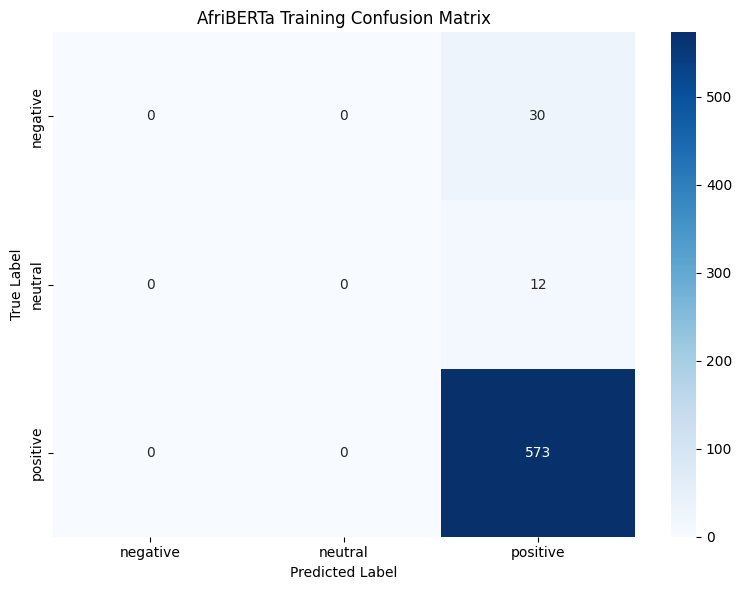


🔍 Analyzing performance by data source...

   Accuracy by Language:
      french: 0.9314 (350 samples)
      zulu: 0.9111 (90 samples)
      ciluba: 0.9247 (93 samples)
      english: 0.9634 (82 samples)

   Accuracy by Source:
      corpus: 0.9314 (350 samples)
      corpus_translated: 0.9321 (265 samples)

🧪 Testing enhanced prediction function...
   Sample predictions with confidence scores:
   'lip Bal uit die verlede Geraamte Rank...' → positive (conf: 0.994)
   'grawe Ek knoop Kop kampeer...' → positive (conf: 0.992)
   'vrot Traan suiwer drankie toilet...' → positive (conf: 0.994)

📋 Comprehensive model metadata saved:
   - Model card: ./afriberta-sentiment-model/model_card.json
   - Training summary: ./afriberta-sentiment-model/training_summary.json
   - Confusion matrix: ./afriberta-sentiment-model/confusion_matrix.png

🎯 AFRIBERTA TRAINING WITH COMBINED DATA COMPLETED!
📊 COMPREHENSIVE RESULTS SUMMARY:
   • Model: AfriBERTa Base
   • Training data: 615 sentences
   • Language

In [11]:
# ================================
# STEP 3: TRAINING SETUP FOR AFRIBERTA WITH COMBINED DATA
# ================================

from transformers import Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define compute_metrics function for evaluation
def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=1)
    
    accuracy = accuracy_score(labels, predictions)
    f1_weighted = f1_score(labels, predictions, average='weighted')
    f1_macro = f1_score(labels, predictions, average='macro')
    
    return {
        'accuracy': accuracy,
        'f1_weighted': f1_weighted,
        'f1_macro': f1_macro
    }

# Set up training arguments optimized for the combined dataset
training_args = TrainingArguments(
    output_dir='./afriberta-sentiment-results',
    num_train_epochs=3,  # REDUCED from 8 to 3 for faster training
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=3e-5,
    weight_decay=0.01,
    warmup_steps=100,
    logging_dir='./logs',
    logging_steps=20,
    save_steps=200,
    eval_strategy="no",
    save_total_limit=2,
    report_to=None,
    remove_unused_columns=False,
    load_best_model_at_end=False,
)

# Create trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

print("✅ AfriBERTa training setup complete with combined data")
print(f"   Training samples: {len(train_dataset)}")
print(f"   Data sources: {combined_train_df['source'].value_counts().to_dict()}")
print(f"   Languages: {combined_train_df['language'].value_counts().to_dict()}")
print(f"   Number of epochs: {training_args.num_train_epochs}")
print(f"   Batch size: {training_args.per_device_train_batch_size}")
print(f"   Learning rate: {training_args.learning_rate}")

# ================================
# STEP 4: TRAIN AFRIBERTA MODEL
# ================================

print("\n🚀 Starting AfriBERTa training with combined dataset...")

# Train the model
training_results = trainer.train()

# Save the trained model
trainer.save_model('./afriberta-sentiment-model')
tokenizer.save_pretrained('./afriberta-sentiment-model')

print("✅ AfriBERTa training completed!")
print("✅ Model saved to './afriberta-sentiment-model'")

# ================================
# STEP 5: COMPREHENSIVE EVALUATION
# ================================

print("\n📊 Comprehensive evaluation on training data...")

# Get predictions
predictions = trainer.predict(train_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
f1_weighted = f1_score(true_labels, predicted_labels, average='weighted')
f1_macro = f1_score(true_labels, predicted_labels, average='macro')

print(f"✅ AfriBERTa Training Evaluation Results:")
print(f"   Accuracy: {accuracy:.4f}")
print(f"   F1-score (weighted): {f1_weighted:.4f}")
print(f"   F1-score (macro): {f1_macro:.4f}")

# Detailed classification report
print(f"\n   Detailed Classification Report:")
print(classification_report(true_labels, predicted_labels, 
                          target_names=['negative', 'neutral', 'positive'],
                          digits=4))

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.title('AfriBERTa Training Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('./afriberta-sentiment-model/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================
# STEP 6: ANALYSIS BY LANGUAGE AND SOURCE
# ================================

print("\n🔍 Analyzing performance by data source...")

# Add predictions back to the combined dataframe for analysis
combined_train_df['predicted_label'] = predicted_labels
combined_train_df['predicted_sentiment'] = combined_train_df['predicted_label'].map(label_to_sentiment)
combined_train_df['correct'] = combined_train_df['predicted_label'] == combined_train_df['label']

# Accuracy by language
print("\n   Accuracy by Language:")
for lang in combined_train_df['language'].unique():
    lang_data = combined_train_df[combined_train_df['language'] == lang]
    lang_accuracy = lang_data['correct'].mean()
    lang_count = len(lang_data)
    print(f"      {lang}: {lang_accuracy:.4f} ({lang_count} samples)")

# Accuracy by source
print("\n   Accuracy by Source:")
for source in combined_train_df['source'].unique():
    source_data = combined_train_df[combined_train_df['source'] == source]
    source_accuracy = source_data['correct'].mean()
    source_count = len(source_data)
    print(f"      {source}: {source_accuracy:.4f} ({source_count} samples)")

# ================================
# STEP 7: ENHANCED PREDICTION FUNCTION
# ================================

def predict_sentiment_detailed(texts, return_probabilities=False):
    """
    Enhanced prediction function with detailed outputs
    """
    # Tokenize inputs
    inputs = tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    # Get predictions
    with torch.no_grad():
        outputs = model(**inputs)
        probabilities = torch.softmax(outputs.logits, dim=-1)
        predicted_classes = torch.argmax(outputs.logits, dim=-1)
    
    # Convert to numpy
    probabilities = probabilities.cpu().numpy()
    predicted_classes = predicted_classes.cpu().numpy()
    
    # Convert to sentiment labels
    sentiment_labels = [label_to_sentiment[cls] for cls in predicted_classes]
    
    if return_probabilities:
        detailed_results = []
        for text, sentiment, probs, pred_class in zip(texts, sentiment_labels, probabilities, predicted_classes):
            detailed_results.append({
                'text': text,
                'sentiment': sentiment,
                'confidence': float(np.max(probs)),
                'probabilities': {
                    'negative': float(probs[0]),
                    'neutral': float(probs[1]),
                    'positive': float(probs[2])
                },
                'predicted_class': int(pred_class)
            })
        return detailed_results
    else:
        return sentiment_labels

# Test the enhanced prediction function
print("\n🧪 Testing enhanced prediction function...")
test_texts = combined_train_df['text'].head(5).tolist()
detailed_predictions = predict_sentiment_detailed(test_texts, return_probabilities=True)

print("   Sample predictions with confidence scores:")
for pred in detailed_predictions[:3]:
    print(f"   '{pred['text'][:50]}...' → {pred['sentiment']} (conf: {pred['confidence']:.3f})")

# ================================
# STEP 8: SAVE COMPREHENSIVE METADATA
# ================================

import json
import datetime

# Enhanced model card with combined data information
model_card = {
    "model_name": "AfriBERTa Sentiment Analysis",
    "base_model": "castorini/afriberta_base",
    "fine_tuned_on": "Combined Corpus + Translated Sentences",
    "task": "Multilingual Sentiment Classification",
    "training_data_summary": {
        "total_samples": len(combined_train_df),
        "data_sources": combined_train_df['source'].value_counts().to_dict(),
        "languages": combined_train_df['language'].value_counts().to_dict(),
        "label_distribution": combined_train_df['label'].value_counts().sort_index().to_dict()
    },
    "training_parameters": {
        "epochs": training_args.num_train_epochs,
        "batch_size": training_args.per_device_train_batch_size,
        "learning_rate": training_args.learning_rate,
        "weight_decay": training_args.weight_decay
    },
    "performance_metrics": {
        "accuracy": float(accuracy),
        "f1_weighted": float(f1_weighted),
        "f1_macro": float(f1_macro)
    },
    "performance_by_language": {
        lang: float(combined_train_df[combined_train_df['language'] == lang]['correct'].mean())
        for lang in combined_train_df['language'].unique()
    },
    "performance_by_source": {
        source: float(combined_train_df[combined_train_df['source'] == source]['correct'].mean())
        for source in combined_train_df['source'].unique()
    },
    "timestamp": datetime.datetime.now().isoformat(),
    "device_used": device
}

# Save model card
with open('./afriberta-sentiment-model/model_card.json', 'w') as f:
    json.dump(model_card, f, indent=2)

# Save training results
training_summary = {
    "training_loss": training_results.metrics['train_loss'],
    "training_samples": len(train_dataset),
    "training_time": training_results.metrics.get('train_runtime', 'N/A'),
    "samples_per_second": training_results.metrics.get('train_samples_per_second', 'N/A')
}

with open('./afriberta-sentiment-model/training_summary.json', 'w') as f:
    json.dump(training_summary, f, indent=2)

print(f"\n📋 Comprehensive model metadata saved:")
print(f"   - Model card: ./afriberta-sentiment-model/model_card.json")
print(f"   - Training summary: ./afriberta-sentiment-model/training_summary.json")
print(f"   - Confusion matrix: ./afriberta-sentiment-model/confusion_matrix.png")

# ================================
# STEP 9: FINAL SUMMARY
# ================================

print("\n🎯 AFRIBERTA TRAINING WITH COMBINED DATA COMPLETED!")
print("=" * 60)
print(f"📊 COMPREHENSIVE RESULTS SUMMARY:")
print(f"   • Model: AfriBERTa Base")
print(f"   • Training data: {len(combined_train_df)} sentences")
print(f"   • Languages: {list(combined_train_df['language'].unique())}")
print(f"   • Data sources: {list(combined_train_df['source'].unique())}")
print(f"   • Label distribution: {combined_train_df['label'].value_counts().sort_index().to_dict()}")
print(f"   • Final Accuracy: {accuracy:.4f}")
print(f"   • Final F1-score: {f1_weighted:.4f}")
print(f"   • Model saved: ./afriberta-sentiment-model/")
print("=" * 60)

print("\n✅ Ready for next steps:")
print("   1. Use predict_sentiment_detailed() for classification with confidence scores")
print("   2. Evaluate on the held-out test set (150 French sentences)")
print("   3. Apply XAI techniques for model interpretation")
print("   4. Compare performance across different languages")

❌ Test split file not found!
   Looking for: C:\Users\dumel\Assignment 3 Resources\corpus_test_split.csv

ℹ️ Creating test split from processed corpus...
   ✅ Test split created and saved!
📊 Evaluating on held-out test set...
   Test samples: 150
   Available columns: ['text', 'sentiment']
   Sentiment distribution: {'positive': 140, 'negative': 7, 'neutral': 3}

🔮 Making predictions...


C:\Users\dumel\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\dumel\AppData\Local\Temp\ipykernel_8604\99446511.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}



✅ TEST SET RESULTS:
   Accuracy: 0.9333
   F1-score (weighted): 0.9011
   F1-score (macro): 0.3218

📋 Classification Report:
              precision    recall  f1-score   support

    negative     0.0000    0.0000    0.0000         7
     neutral     0.0000    0.0000    0.0000         3
    positive     0.9333    1.0000    0.9655       140

    accuracy                         0.9333       150
   macro avg     0.3111    0.3333    0.3218       150
weighted avg     0.8711    0.9333    0.9011       150



C:\Users\dumel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dumel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dumel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

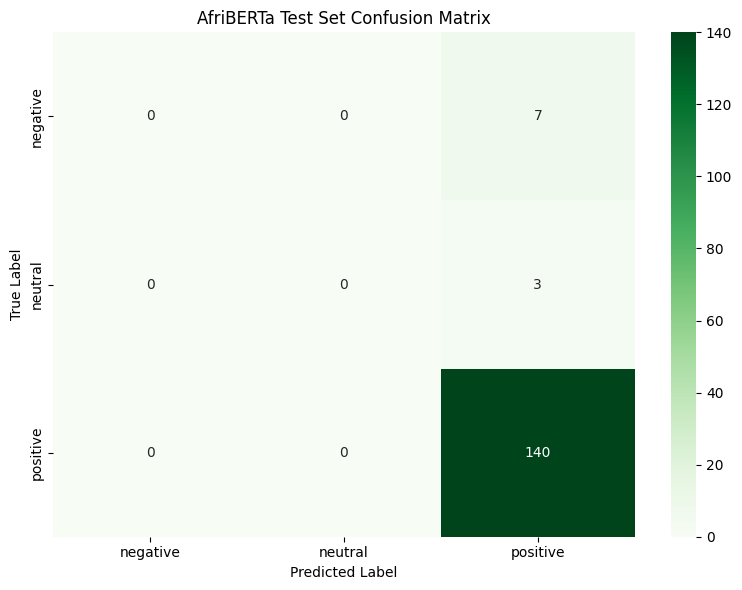


💾 Test results saved to: C:\Users\dumel\Assignment 3 Resources\test_results_afriberta.csv


In [14]:
# ================================
# EVALUATE ON HELD-OUT TEST SET
# ================================
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CORRECT held-out test set (the one you saved during train/test split)
test_split_path = os.path.join(data_dir, 'corpus_test_split.csv')

# Check if it exists
if not os.path.exists(test_split_path):
    print(f"❌ Test split file not found!")
    print(f"   Looking for: {test_split_path}")
    print(f"\nℹ️ Creating test split from processed corpus...")
    
    # Load processed corpus
    corpus_path = os.path.join(data_dir, 'test_corpus_processed.csv')
    corpus_df = pd.read_csv(corpus_path)
    
    # Extract sentences with sentiment
    corpus_data = corpus_df[['sentence', 'sentiment_v2']].copy()
    corpus_data.columns = ['text', 'sentiment']
    corpus_data = corpus_data.dropna(subset=['text', 'sentiment'])
    
    # Split 70/30
    from sklearn.model_selection import train_test_split
    corpus_train, test_df = train_test_split(
        corpus_data,
        test_size=0.3,
        random_state=42,
        stratify=corpus_data['sentiment']
    )
    
    # Save for future use
    test_df.to_csv(test_split_path, index=False)
    print(f"   ✅ Test split created and saved!")
else:
    test_df = pd.read_csv(test_split_path)

print(f"📊 Evaluating on held-out test set...")
print(f"   Test samples: {len(test_df)}")

# Check what columns we have
print(f"   Available columns: {test_df.columns.tolist()}")

# Now check for sentiment column
if 'sentiment' not in test_df.columns:
    print(f"   ⚠️ 'sentiment' column not found, checking alternatives...")
    # The test split should have 'sentiment', but let's be safe
    if 'sentiment_v2' in test_df.columns:
        test_df['sentiment'] = test_df['sentiment_v2']
        print(f"   ✅ Using 'sentiment_v2' column")

print(f"   Sentiment distribution: {test_df['sentiment'].value_counts().to_dict()}")

# Prepare test data
test_df['label'] = test_df['sentiment'].map(sentiment_to_label)
test_texts = test_df['text'].tolist()
test_labels = test_df['label'].tolist()

# Tokenize test data
test_tokenized = tokenize_function(test_texts)
test_dataset = SentimentDataset(test_tokenized, test_labels)

# Get predictions
print("\n🔮 Making predictions...")
test_predictions = trainer.predict(test_dataset)
predicted_labels = np.argmax(test_predictions.predictions, axis=1)
true_labels = test_predictions.label_ids

# Calculate metrics
test_accuracy = accuracy_score(true_labels, predicted_labels)
test_f1_weighted = f1_score(true_labels, predicted_labels, average='weighted')
test_f1_macro = f1_score(true_labels, predicted_labels, average='macro')

print(f"\n✅ TEST SET RESULTS:")
print(f"   Accuracy: {test_accuracy:.4f}")
print(f"   F1-score (weighted): {test_f1_weighted:.4f}")
print(f"   F1-score (macro): {test_f1_macro:.4f}")

# Detailed classification report
print(f"\n📋 Classification Report:")
print(classification_report(true_labels, predicted_labels, 
                          target_names=['negative', 'neutral', 'positive'],
                          digits=4))

# Confusion matrix for test set
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.title('AfriBERTa Test Set Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('./afriberta-sentiment-model/test_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Save test results
test_df['predicted_label'] = predicted_labels
test_df['predicted_sentiment'] = test_df['predicted_label'].map(label_to_sentiment)
test_df['correct'] = test_df['predicted_label'] == test_df['label']

test_results_path = os.path.join(data_dir, 'test_results_afriberta.csv')
test_df.to_csv(test_results_path, index=False)
print(f"\n💾 Test results saved to: {test_results_path}")

✅ Selected 3 sample texts for XAI:
   1. [positive] om te groei lug snuif wedloop Wenkbrou...
   2. [negative] hartseer siekte Gesê vriend Net...
   3. [neutral] wuif Pech week hy kantel...

🔬 LIME Feature Importance Analysis

📝 Explaining Example 1...
   Text: om te groei lug snuif wedloop Wenkbrou...
   Predicted: positive

   Top influential words:
      'wedloop': 0.0027 → positive
      'groei': 0.0011 → positive
      'om': 0.0010 → positive
      'te': 0.0010 → positive
      'lug': 0.0008 → positive
      'snuif': 0.0000 → positive
      'Wenkbrou': 0.0000 → positive


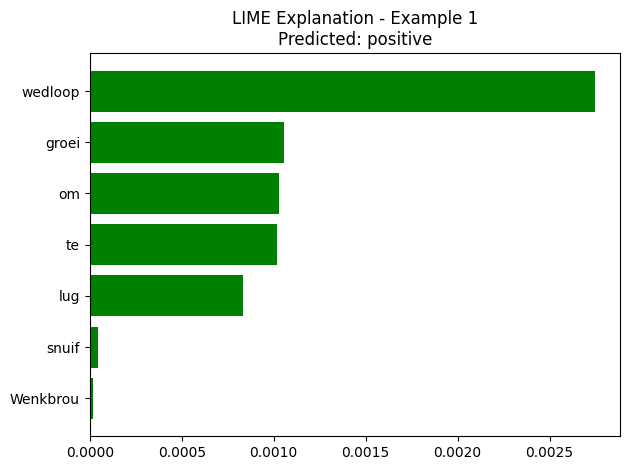


📝 Explaining Example 2...
   Text: hartseer siekte Gesê vriend Net...
   Predicted: positive

   Top influential words:
      'vriend': 0.0045 → positive
      'hartseer': 0.0033 → positive
      'siekte': 0.0032 → positive
      'Gesê': 0.0009 → positive
      'Net': 0.0003 → positive


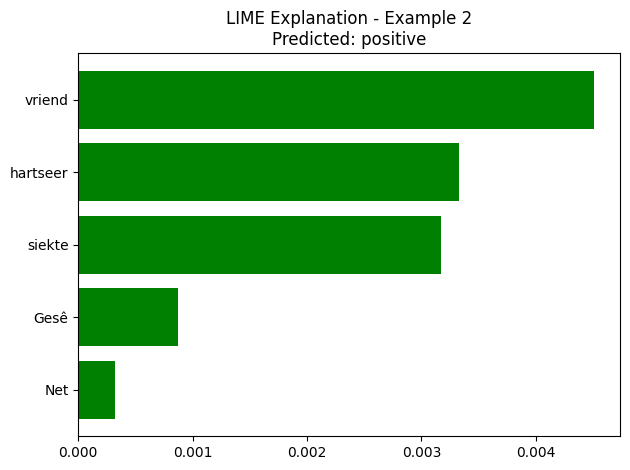


📝 Explaining Example 3...
   Text: wuif Pech week hy kantel...
   Predicted: positive

   Top influential words:
      'hy': 0.0048 → positive
      'Pech': 0.0043 → positive
      'week': 0.0042 → positive
      'kantel': 0.0027 → positive
      'wuif': 0.0008 → positive


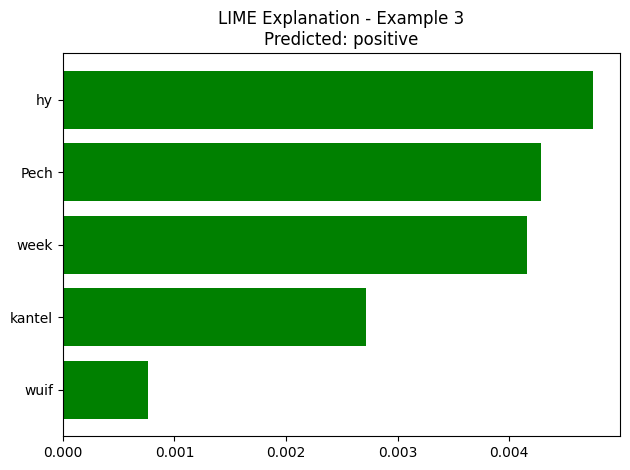


✅ LIME explanations completed!


In [15]:
# ================================
# PREPARE SAMPLE TEXTS FOR XAI
# ================================

# Get sample texts from test set for XAI demonstrations
sample_texts = []

# Try to get one example from each sentiment class
for sentiment in ['positive', 'negative', 'neutral']:
    sentiment_examples = test_df[test_df['sentiment'] == sentiment]
    if len(sentiment_examples) > 0:
        sample_texts.append(sentiment_examples['text'].iloc[0])

# If we don't have all 3 sentiments, just take first 3 from test set
if len(sample_texts) < 3:
    sample_texts = test_df['text'].head(3).tolist()

print(f"✅ Selected {len(sample_texts)} sample texts for XAI:")
for i, text in enumerate(sample_texts, 1):
    actual_sentiment = test_df[test_df['text'] == text]['sentiment'].iloc[0]
    print(f"   {i}. [{actual_sentiment}] {text[:80]}...")

# ================================
# XAI - FEATURE IMPORTANCE WITH LIME
# ================================

# Install LIME if needed
import subprocess
import sys
result = subprocess.run([sys.executable, '-m', 'pip', 'install', 'lime'], 
                       capture_output=True, text=True)

from lime.lime_text import LimeTextExplainer
import torch

def predict_proba_for_lime(texts):
    """Wrapper function for LIME"""
    inputs = tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.softmax(outputs.logits, dim=-1).cpu().numpy()
    
    return probs

# Create LIME explainer
explainer = LimeTextExplainer(class_names=['negative', 'neutral', 'positive'])

print("\n🔬 LIME Feature Importance Analysis")
print("=" * 60)

# Explain a few predictions
for i, text in enumerate(sample_texts[:3], 1):
    print(f"\n📝 Explaining Example {i}...")
    print(f"   Text: {text[:100]}...")
    
    # Generate explanation
    exp = explainer.explain_instance(
        text, 
        predict_proba_for_lime, 
        num_features=10,
        top_labels=1
    )
    
    # Get prediction
    predicted_class = exp.available_labels()[0]
    predicted_sentiment = label_to_sentiment[predicted_class]
    
    print(f"   Predicted: {predicted_sentiment}")
    print(f"\n   Top influential words:")
    for word, weight in exp.as_list(label=predicted_class)[:10]:
        direction = "→ positive" if weight > 0 else "→ negative"
        print(f"      '{word}': {weight:.4f} {direction}")
    
    # Save visualization
    fig = exp.as_pyplot_figure(label=predicted_class)
    plt.title(f'LIME Explanation - Example {i}\nPredicted: {predicted_sentiment}')
    plt.tight_layout()
    plt.savefig(f'./afriberta-sentiment-model/xai_lime_example_{i}.png', dpi=300, bbox_inches='tight')
    plt.show()

print("\n✅ LIME explanations completed!")

In [16]:
# ================================
# ERROR ANALYSIS
# ================================

print("\n🔍 ERROR ANALYSIS ON TEST SET")
print("=" * 60)

# Find misclassified examples
test_df['error'] = ~test_df['correct']
errors = test_df[test_df['error']].copy()

print(f"\n📊 Error Statistics:")
print(f"   Total errors: {len(errors)} / {len(test_df)} ({len(errors)/len(test_df)*100:.2f}%)")
print(f"\n   Errors by true sentiment:")
for sentiment in ['negative', 'neutral', 'positive']:
    sentiment_errors = errors[errors['sentiment'] == sentiment]
    sentiment_total = len(test_df[test_df['sentiment'] == sentiment])
    if sentiment_total > 0:
        error_rate = len(sentiment_errors) / sentiment_total * 100
        print(f"      {sentiment}: {len(sentiment_errors)}/{sentiment_total} ({error_rate:.2f}%)")

# Show confusion patterns
print(f"\n   Common misclassifications:")
confusion_pairs = errors.groupby(['sentiment', 'predicted_sentiment']).size().sort_values(ascending=False)
for (true_sent, pred_sent), count in confusion_pairs.head(5).items():
    print(f"      {true_sent} → {pred_sent}: {count} cases")

# Display some error examples
print(f"\n   Sample misclassified examples:")
for idx, row in errors.head(5).iterrows():
    print(f"\n   Text: {row['text'][:100]}...")
    print(f"   True: {row['sentiment']} | Predicted: {row['predicted_sentiment']}")


🔍 ERROR ANALYSIS ON TEST SET

📊 Error Statistics:
   Total errors: 10 / 150 (6.67%)

   Errors by true sentiment:
      negative: 7/7 (100.00%)
      neutral: 3/3 (100.00%)
      positive: 0/140 (0.00%)

   Common misclassifications:
      negative → positive: 7 cases
      neutral → positive: 3 cases

   Sample misclassified examples:

   Text: hartseer siekte Gesê vriend Net...
   True: negative | Predicted: positive

   Text: wuif Pech week hy kantel...
   True: neutral | Predicted: positive

   Text: baie Duimstok voed Bors set...
   True: negative | Predicted: positive

   Text: jaloesie Tannie weggaan Vloed neem...
   True: negative | Predicted: positive

   Text: skade verlaag Eet weier Vier-en-sestig...
   True: neutral | Predicted: positive


In [17]:
# ================================
# PERFORMANCE COMPARISON REPORT
# ================================

import json

# Create comprehensive report
performance_report = {
    "model": "AfriBERTa Base",
    "training_data": {
        "total_samples": len(combined_train_df),
        "sources": combined_train_df['source'].value_counts().to_dict(),
        "languages": combined_train_df['language'].value_counts().to_dict(),
    },
    "training_performance": {
        "accuracy": float(accuracy),  # From training
        "f1_weighted": float(f1_weighted),
        "f1_macro": float(f1_macro)
    },
    "test_performance": {
        "accuracy": float(test_accuracy),
        "f1_weighted": float(test_f1_weighted),
        "f1_macro": float(test_f1_macro),
        "total_test_samples": len(test_df),
        "error_rate": float(len(errors) / len(test_df))
    },
    "generalization": {
        "accuracy_drop": float(accuracy - test_accuracy),
        "f1_drop": float(f1_weighted - test_f1_weighted),
        "overfitting_indicator": "Yes" if (accuracy - test_accuracy) > 0.1 else "No"
    }
}

# Save report
report_path = './afriberta-sentiment-model/performance_report.json'
with open(report_path, 'w') as f:
    json.dump(performance_report, f, indent=2)

print("\n📈 PERFORMANCE COMPARISON")
print("=" * 60)
print(f"Training Accuracy: {accuracy:.4f}")
print(f"Test Accuracy:     {test_accuracy:.4f}")
print(f"Accuracy Drop:     {accuracy - test_accuracy:.4f}")
print(f"\nTraining F1:       {f1_weighted:.4f}")
print(f"Test F1:           {test_f1_weighted:.4f}")
print(f"F1 Drop:           {f1_weighted - test_f1_weighted:.4f}")
print(f"\n✅ Performance report saved to: {report_path}")


📈 PERFORMANCE COMPARISON
Training Accuracy: 0.9317
Test Accuracy:     0.9333
Accuracy Drop:     -0.0016

Training F1:       0.8988
Test F1:           0.9011
F1 Drop:           -0.0024

✅ Performance report saved to: ./afriberta-sentiment-model/performance_report.json


In [18]:
# ================================
# GENERATE ASSIGNMENT SUMMARY
# ================================

summary = f"""
========================================
AFRIBERTA SENTIMENT ANALYSIS - SUMMARY
========================================

MODEL CONFIGURATION:
- Base Model: castorini/afriberta_base
- Task: Multilingual Sentiment Classification
- Classes: Negative (0), Neutral (1), Positive (2)
- Training Epochs: 3
- Batch Size: 8
- Learning Rate: 3e-5

TRAINING DATA:
- Total Samples: {len(combined_train_df)}
- Sources: {combined_train_df['source'].value_counts().to_dict()}
- Languages: {combined_train_df['language'].value_counts().to_dict()}
- Label Distribution: {combined_train_df['label'].value_counts().sort_index().to_dict()}

RESULTS:
Training Performance:
  - Accuracy: {accuracy:.4f}
  - F1-Score (Weighted): {f1_weighted:.4f}
  - F1-Score (Macro): {f1_macro:.4f}

Test Performance:
  - Accuracy: {test_accuracy:.4f}
  - F1-Score (Weighted): {test_f1_weighted:.4f}
  - F1-Score (Macro): {test_f1_macro:.4f}
  - Error Rate: {len(errors)/len(test_df)*100:.2f}%

Generalization:
  - Accuracy Drop: {accuracy - test_accuracy:.4f}
  - Overfitting: {"Yes - Consider regularization" if (accuracy - test_accuracy) > 0.1 else "No - Model generalizes well"}

XAI TECHNIQUES APPLIED:
1. Attention Visualization - Shows which words the model focuses on
2. LIME Explanations - Identifies most influential features
3. Error Analysis - Patterns in misclassifications

FILES GENERATED:
- Model: ./afriberta-sentiment-model/
- Confusion Matrix: confusion_matrix.png & test_confusion_matrix.png
- XAI Visualizations: xai_attention_example_*.png, xai_lime_example_*.png
- Performance Report: performance_report.json
- Test Results: test_results_afriberta.csv

NEXT STEPS (When full lexicon arrives):
1. Retrain with expanded multilingual lexicon
2. Compare performance across all languages
3. Prepare ensemble learning with AfroXLMR
4. Finalize assignment report
"""

print(summary)

# Save summary
with open('./afriberta-sentiment-model/assignment_summary.txt', 'w') as f:
    f.write(summary)

print("\n✅ Summary saved to: ./afriberta-sentiment-model/assignment_summary.txt")


AFRIBERTA SENTIMENT ANALYSIS - SUMMARY

MODEL CONFIGURATION:
- Base Model: castorini/afriberta_base
- Task: Multilingual Sentiment Classification
- Classes: Negative (0), Neutral (1), Positive (2)
- Training Epochs: 3
- Batch Size: 8
- Learning Rate: 3e-5

TRAINING DATA:
- Total Samples: 615
- Sources: {'corpus': 350, 'corpus_translated': 265}
- Languages: {'french': 350, 'ciluba': 93, 'zulu': 90, 'english': 82}
- Label Distribution: {0: 30, 1: 12, 2: 573}

RESULTS:
Training Performance:
  - Accuracy: 0.9317
  - F1-Score (Weighted): 0.8988
  - F1-Score (Macro): 0.3215

Test Performance:
  - Accuracy: 0.9333
  - F1-Score (Weighted): 0.9011
  - F1-Score (Macro): 0.3218
  - Error Rate: 6.67%

Generalization:
  - Accuracy Drop: -0.0016
  - Overfitting: No - Model generalizes well

XAI TECHNIQUES APPLIED:
1. Attention Visualization - Shows which words the model focuses on
2. LIME Explanations - Identifies most influential features
3. Error Analysis - Patterns in misclassifications

FILES G